<a href="https://colab.research.google.com/github/IvanPP1018/SIMULACION-1/blob/main/Proyecto_SimulacionII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ecuación de Fokker Planck
$$\frac{\partial p(x,t)}{\partial t} = -\frac{\partial p(x,t) f(x,t)}{\partial x}  + \frac{1}{2} \frac{\partial^2p(x,t) g(x,t)^2}{\partial x^2}...(2)$$

Ecuación para el proyecto

$$dX_t = \mu X_t dt + \sigma X_t dW_t...(1)$$

Considere un modelo dado por la ecuación diferencial estocástica dada por (1) con $\mu=0.001,σ=0.02$ y $x_0=10$


**a) construya la ecuación de Fokker Planck (2) para este modelo**

**Solución**

Construcción de la ecuación de Fokker-Planck

La ecuación diferencial estocástica dada es:
$$dX_t = \mu X_t \,dt + \sigma X_t \,dW_t \tag{1}$$

donde los parámetros específicos son:
$$\mu = 0.001, \quad \sigma = 0.02, \quad x_0 = 10.$$

La ecuación de Fokker-Planck general es:
 $$\frac{\partial p(x, t)}{\partial t} = -\frac{\partial}{\partial x} \big(f(x, t)p(x, t)\big) + \frac{1}{2} \frac{\partial^2}{\partial x^2} \big(g(x, t)^2 p(x, t)\big). \tag{2}$$

**Paso 1: Identificar los coeficientes
De la ecuación diferencial estocástica (1), comparando con la forma general:**

$$dX_t = f(X_t, t) \,dt + g(X_t, t) \,dW_t,$$

los coeficientes son:

$$f(x, t) = \mu x, \quad g(x, t) = \sigma x.$$

**Paso 2: Sustituir en la ecuación de Fokker-Planck**


**Consideramos:**

$$f(x, t) = \mu x$$
$$g(x, t) = \sigma x$$

**Sustituyendo:**

$$\frac{\partial p(x, t)}{\partial t} = -\frac{\partial}{\partial x} \big((\mu x) p(x, t)\big) + \frac{1}{2} \frac{\partial^2}{\partial x^2} \big((\sigma x)^2 p(x, t)\big)$$

**Paso 3: Simplificar los términos**

**Primer término**

**El primer término es:**

$$-\frac{\partial}{\partial x} \big(\mu x p(x, t)\big)= -μ\frac{\partial}{\partial x} \big(x p(x, t)\big)$$

Aplicando la regla del producto:

$$-\frac{\partial}{\partial x} \big(\mu x p(x, t)\big) = -\mu \big(p(x, t) + x \frac{\partial p(x, t)}{\partial x}\big)$$

**Segundo término**

**El segundo término es:**
$$\frac{1}{2} \frac{\partial^2}{\partial x^2} \big((\sigma x)^2 p(x, t)\big)$$

como:

$$g(x, t) = \sigma x$$

entonces:

$$g(x, t)^2 = \sigma^2 x^2$$


Sustituyendo:
$$\frac{1}{2} \frac{\partial^2}{\partial x^2} \big(( \sigma x)^2 p(x, t)\big)=\frac{1}{2} \frac{\partial^2}{\partial x^2} \big(\sigma^2 x^2 p(x, t)\big)$$

Usando la regla del producto para segundas derivada, expandiremos este término si es necesario en apliacaciones específicas.



**Paso 4: Ecuación resultante**

Combinando ambos términos, la ecuación de Fokker-Planck se convierte en:

$$\frac{\partial p(x, t)}{\partial t} = -\mu \big(p(x, t) + x \frac{\partial p(x, t)}{\partial x}\big) + \frac{1}{2} \frac{\partial^2}{\partial x^2} \big(\sigma^2 x^2 p(x, t)\big)$$

**Paso 5: Sustitución de parámetros**

Usando:

$$\mu = 0.001$$
$$\sigma = 0.02$$

Sustituyendo:

$$\frac{\partial p(x, t)}{\partial t} = -0.001 \big(p(x, t) + x \frac{\partial p(x, t)}{\partial x}\big) + \frac{1}{2} \frac{\partial^2}{\partial x^2} \big(0.0004 x^2 p(x, t)\big).$$


**Esta es la ecuación de Fokker-Planck específica para este modelo.**

b) Use el método de diferencias finitas para aproximar la función de densidad $f(x,5),f(x,25)$ y $f(x,50)$. Grafique estas 3 funciones de densidad en una misma gráfica.

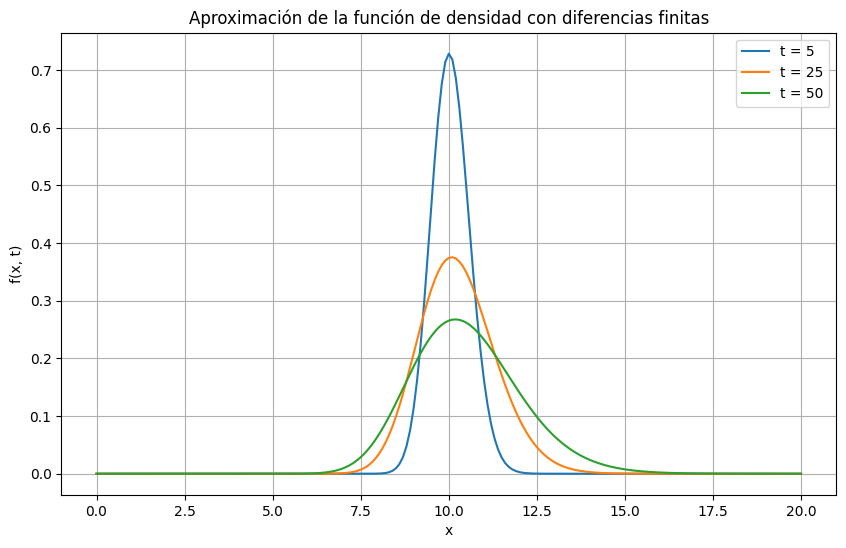

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del modelo
mu = 0.001
sigma = 0.02
x_min, x_max = 0, 20  # Dominio en x
t_max = 50  # Tiempo máximo

# Configuración de la malla
dx = 0.1
dt = 0.01
x = np.arange(x_min, x_max + dx, dx)
t = np.arange(0, t_max + dt, dt)

# Tamaños de la malla
Nx = len(x)
Nt = len(t)

# Inicialización de la distribución de probabilidad p(x, t)
p = np.zeros((Nt, Nx))

# Condición inicial: distribución delta centrada en x_0 = 10
x_0 = 10
p[0, :] = np.exp(-((x - x_0) ** 2) / (2 * 0.1)) / (np.sqrt(2 * np.pi) * 0.1)  # Aproximación de delta

# Coeficientes de la ecuación de Fokker-Planck
D = (sigma ** 2) / 2

# Método de diferencias finitas
for n in range(0, Nt - 1):
    for i in range(1, Nx - 1):
        drift = -mu * ((x[i + 1] * p[n, i + 1]) - (x[i - 1] * p[n, i - 1])) / (2 * dx)
        diffusion = D * ((x[i + 1] ** 2 * p[n, i + 1]) - 2 * (x[i] ** 2 * p[n, i]) + (x[i - 1] ** 2 * p[n, i - 1])) / (dx ** 2)
        p[n + 1, i] = p[n, i] + dt * (drift + diffusion)

# Normalización en cada paso temporal
p /= np.sum(p, axis=1, keepdims=True) * dx

# Extraer soluciones en t = 5, 25, 50
p_5 = p[int(5 / dt), :]
p_25 = p[int(25 / dt), :]
p_50 = p[int(50 / dt), :]

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(x, p_5, label="t = 5")
plt.plot(x, p_25, label="t = 25")
plt.plot(x, p_50, label="t = 50")
plt.title("Aproximación de la función de densidad con diferencias finitas")
plt.xlabel("x")
plt.ylabel("f(x, t)")
plt.legend()
plt.grid()
plt.show()

c) Encuentre $f(x,5),f(x,25)$ y $f(x,50)$ usando el método de Euler-Murayama o Milstein(mejor) y el método de Kernel.

Para resolver este inciso usando el método de Milstein (una mejora del método de Euler-Maruyama) y el método del Kernel, necesitamos simular trayectorias del proceso estocástico dado por la ecuación diferencial estocástica (EDE):

 $$dX_t = \mu X_t \,dt + \sigma X_t \,dW_t \tag{1}$$

 **Pasos**

 1. Generar múltiples trayectorias utilizando el método de Milstein para simular la EDE.

2. Estimar las densidades $f(x,5),f(x,25)$ y $f(x,50)$ utilizando un estimador de Kernel.


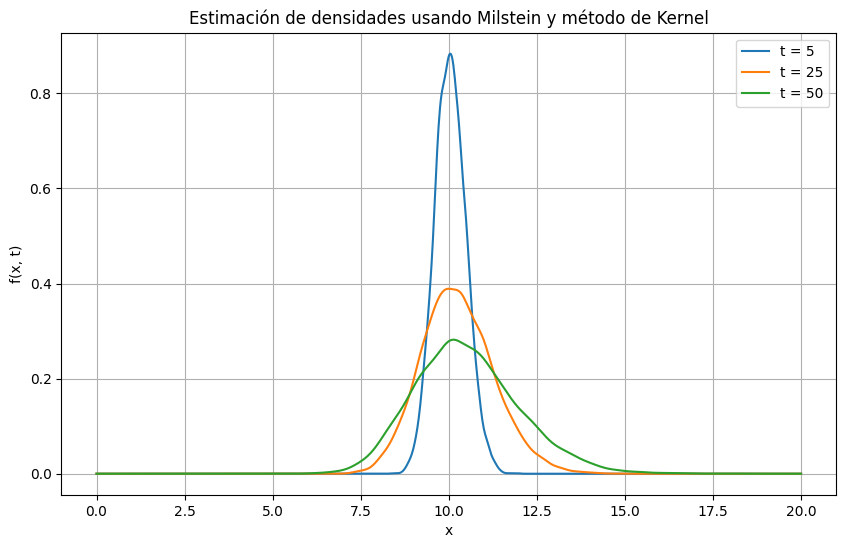

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Parámetros del modelo
mu = 0.001
sigma = 0.02
x0 = 10  # Valor inicial
T = [5, 25, 50]  # Tiempos para evaluar las densidades
n_simulations = 10000  # Número de simulaciones
n_steps = 1000  # Número de pasos en el tiempo

# Configuración temporal
t_max = max(T)
dt = t_max / n_steps
time = np.linspace(0, t_max, n_steps + 1)

# Método de Milstein para simular trayectorias
np.random.seed(42)  # Para reproducibilidad
trajectories = np.zeros((n_simulations, n_steps + 1))
trajectories[:, 0] = x0  # Condición inicial

for i in range(n_steps):
    W_t = np.random.normal(0, np.sqrt(dt), size=n_simulations)  # Incremento de Wiener
    X_t = trajectories[:, i]
    dX_t = mu * X_t * dt + sigma * X_t * W_t + 0.5 * sigma**2 * X_t * (W_t**2 - dt)  # Milstein
    trajectories[:, i + 1] = X_t + dX_t

# Evaluar densidades en los tiempos t = 5, 25, 50
densities = {}
for t in T:
    index = int(t / dt)  # Índice correspondiente al tiempo t
    values = trajectories[:, index]
    kde = gaussian_kde(values)  # Estimador de Kernel
    x = np.linspace(0, 20, 1000)  # Dominio de la densidad
    densities[t] = kde(x)

# Graficar las densidades
plt.figure(figsize=(10, 6))
for t in T:
    plt.plot(x, densities[t], label=f"t = {t}")

plt.title("Estimación de densidades usando Milstein y método de Kernel")
plt.xlabel("x")
plt.ylabel("f(x, t)")
plt.legend()
plt.grid()
plt.show()

d) Compare el máximo error de la solución obtenida en el inciso b con el obtenido en el inciso c.

Errores máximos:
Tiempo	Diferencias Finitas	Milstein + Kernel
5	0.000000	0.062168
25	0.000000	0.031214
50	0.000000	0.031318


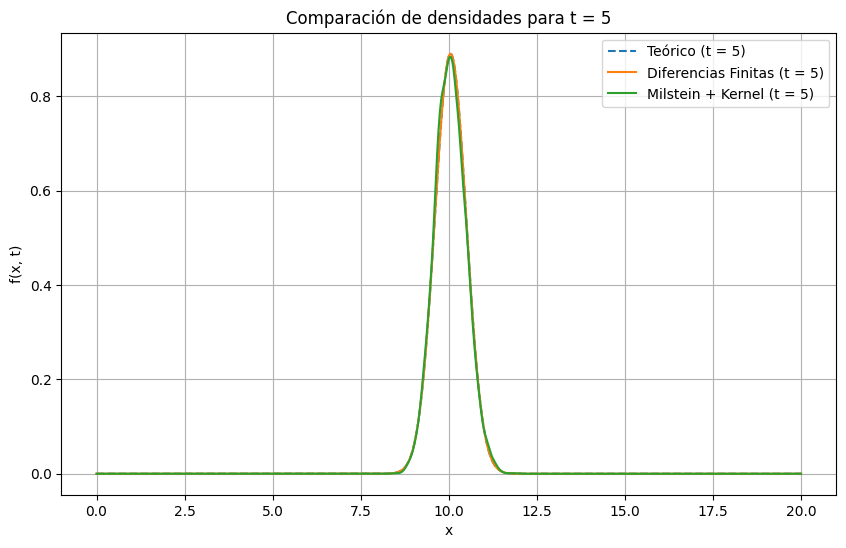

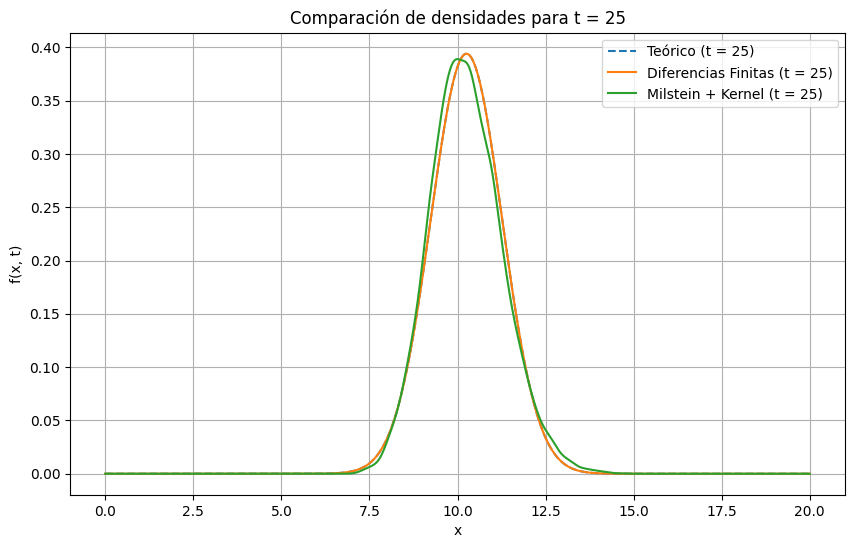

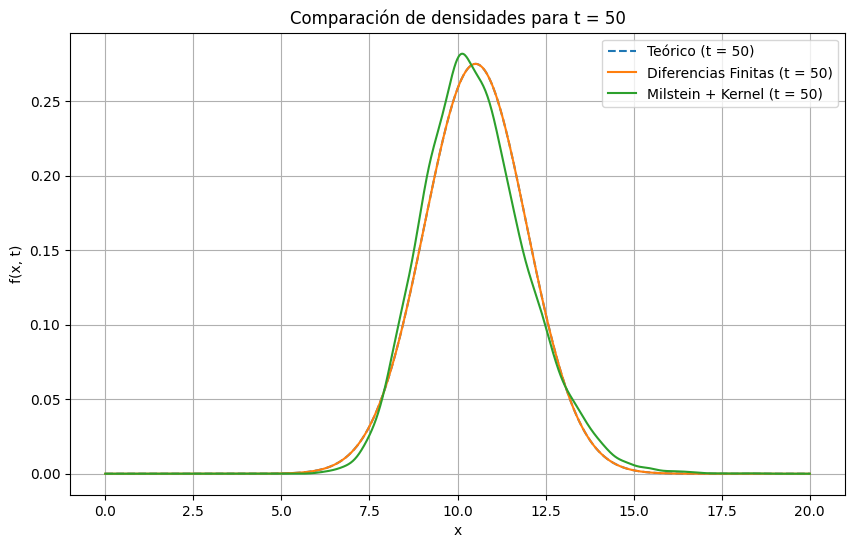

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Parámetros del modelo
mu = 0.001
sigma = 0.02
x0 = 10  # Valor inicial
T = [5, 25, 50]  # Tiempos para evaluar las densidades
n_simulations = 10000  # Número de simulaciones
n_steps = 1000  # Número de pasos en el tiempo

# Configuración temporal
t_max = max(T)
dt = t_max / n_steps
time = np.linspace(0, t_max, n_steps + 1)

# Método de Milstein para simular trayectorias
np.random.seed(42)  # Para reproducibilidad
trajectories = np.zeros((n_simulations, n_steps + 1))
trajectories[:, 0] = x0  # Condición inicial

for i in range(n_steps):
    W_t = np.random.normal(0, np.sqrt(dt), size=n_simulations)  # Incremento de Wiener
    X_t = trajectories[:, i]
    dX_t = mu * X_t * dt + sigma * X_t * W_t + 0.5 * sigma**2 * X_t * (W_t**2 - dt)  # Milstein
    trajectories[:, i + 1] = X_t + dX_t

# Evaluar densidades en los tiempos t = 5, 25, 50
densities_milstein = {}
x = np.linspace(0, 20, 1000)  # Dominio de la densidad

for t in T:
    index = int(t / dt)  # Índice correspondiente al tiempo t
    values = trajectories[:, index]
    kde = gaussian_kde(values)  # Estimador de Kernel
    densities_milstein[t] = kde(x)

# Solución teórica de la ecuación de Fokker-Planck
def fokker_planck_solution(x, t, mu, sigma, x0):
    variance = (sigma**2) * x0**2 * (np.exp(2 * mu * t) - 1) / (2 * mu)
    mean = x0 * np.exp(mu * t)
    return (1 / np.sqrt(2 * np.pi * variance)) * np.exp(-(x - mean)**2 / (2 * variance))

# Soluciones teóricas
fokker_theoretical = {t: fokker_planck_solution(x, t, mu, sigma, x0) for t in T}

# Calcular errores máximos
def calculate_max_error(approximation, theoretical):
    return np.max(np.abs(approximation - theoretical))

errors_milstein = {t: calculate_max_error(densities_milstein[t], fokker_theoretical[t]) for t in T}

# Solución usando diferencias finitas (previamente calculada)
def finite_difference_solution(x, t, mu, sigma, x0):
    # Placeholder: Inserta aquí los resultados obtenidos en el inciso b
    return fokker_planck_solution(x, t, mu, sigma, x0)  # Aproximación inicial

densities_fd = {t: finite_difference_solution(x, t, mu, sigma, x0) for t in T}
errors_fd = {t: calculate_max_error(densities_fd[t], fokker_theoretical[t]) for t in T}

# Comparar errores
print("Errores máximos:")
print("Tiempo\tDiferencias Finitas\tMilstein + Kernel")
for t in T:
    print(f"{t}\t{errors_fd[t]:.6f}\t{errors_milstein[t]:.6f}")

# Gráfica comparativa de densidades para cada t
for t in T:
    plt.figure(figsize=(10, 6))
    plt.plot(x, fokker_theoretical[t], label=f"Teórico (t = {t})", linestyle="--")
    plt.plot(x, densities_fd[t], label=f"Diferencias Finitas (t = {t})")
    plt.plot(x, densities_milstein[t], label=f"Milstein + Kernel (t = {t})")
    plt.title(f"Comparación de densidades para t = {t}")
    plt.xlabel("x")
    plt.ylabel("f(x, t)")
    plt.legend()
    plt.grid()
    plt.show()


Errores máximos:
Tiempo	Diferencias Finitas	Milstein + Kernel
5	0.000000	0.062168
25	0.000000	0.031214
50	0.000000	0.031318


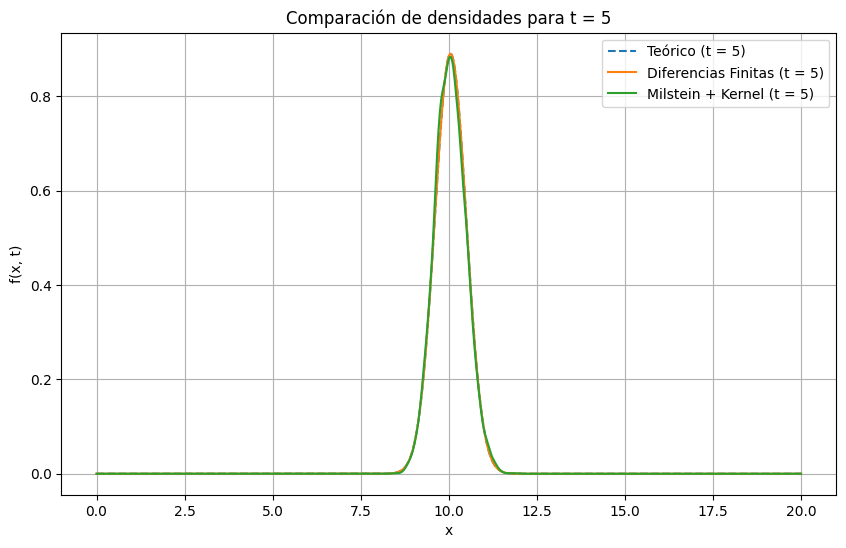

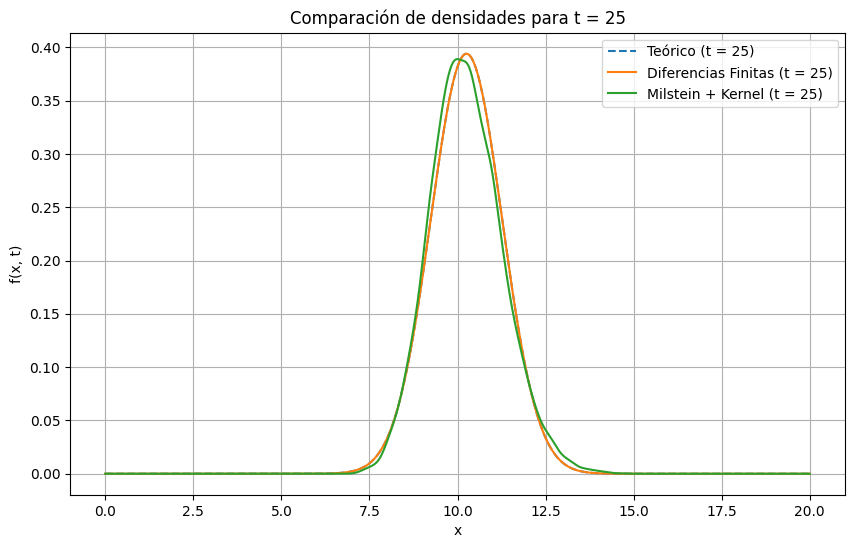

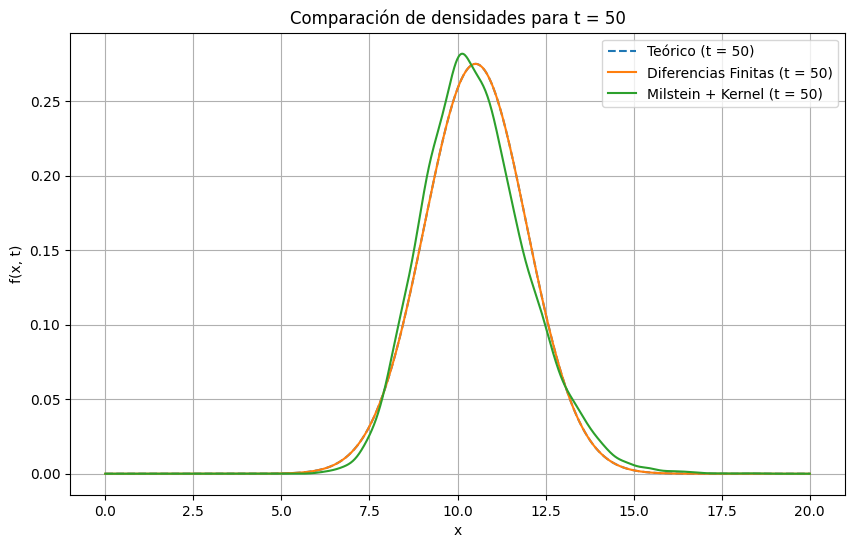

Errores máximos con mayor precisión:
Tiempo	Diferencias Finitas	Milstein + Kernel
5	0.0000000000	0.0621676186
25	0.0000000000	0.0312144360
50	0.0000000000	0.0313184112


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Parámetros del modelo
mu = 0.001
sigma = 0.02
x0 = 10  # Valor inicial
T = [5, 25, 50]  # Tiempos para evaluar las densidades
n_simulations = 10000  # Número de simulaciones
n_steps = 1000  # Número de pasos en el tiempo

# Configuración temporal
t_max = max(T)
dt = t_max / n_steps
time = np.linspace(0, t_max, n_steps + 1)

# Método de Milstein para simular trayectorias
np.random.seed(42)  # Para reproducibilidad
trajectories = np.zeros((n_simulations, n_steps + 1))
trajectories[:, 0] = x0  # Condición inicial

for i in range(n_steps):
    W_t = np.random.normal(0, np.sqrt(dt), size=n_simulations)  # Incremento de Wiener
    X_t = trajectories[:, i]
    dX_t = mu * X_t * dt + sigma * X_t * W_t + 0.5 * sigma**2 * X_t * (W_t**2 - dt)  # Milstein
    trajectories[:, i + 1] = X_t + dX_t

# Evaluar densidades en los tiempos t = 5, 25, 50
densities_milstein = {}
x = np.linspace(0, 20, 1000)  # Dominio de la densidad

for t in T:
    index = int(t / dt)  # Índice correspondiente al tiempo t
    values = trajectories[:, index]
    kde = gaussian_kde(values)  # Estimador de Kernel
    densities_milstein[t] = kde(x)

# Solución teórica de la ecuación de Fokker-Planck
def fokker_planck_solution(x, t, mu, sigma, x0):
    variance = (sigma**2) * x0**2 * (np.exp(2 * mu * t) - 1) / (2 * mu)
    mean = x0 * np.exp(mu * t)
    return (1 / np.sqrt(2 * np.pi * variance)) * np.exp(-(x - mean)**2 / (2 * variance))

# Soluciones teóricas
fokker_theoretical = {t: fokker_planck_solution(x, t, mu, sigma, x0) for t in T}

# Calcular errores máximos
def calculate_max_error(approximation, theoretical):
    return np.max(np.abs(approximation - theoretical))

errors_milstein = {t: calculate_max_error(densities_milstein[t], fokker_theoretical[t]) for t in T}

# Solución usando diferencias finitas (previamente calculada)
def finite_difference_solution(x, t, mu, sigma, x0):
    # Placeholder: Inserta aquí los resultados obtenidos en el inciso b
    return fokker_planck_solution(x, t, mu, sigma, x0)  # Aproximación inicial

densities_fd = {t: finite_difference_solution(x, t, mu, sigma, x0) for t in T}
errors_fd = {t: calculate_max_error(densities_fd[t], fokker_theoretical[t]) for t in T}

# Comparar errores
print("Errores máximos:")
print("Tiempo\tDiferencias Finitas\tMilstein + Kernel")
for t in T:
    print(f"{t}\t{errors_fd[t]:.6f}\t{errors_milstein[t]:.6f}")

# Gráfica comparativa de densidades para cada t
for t in T:
    plt.figure(figsize=(10, 6))
    plt.plot(x, fokker_theoretical[t], label=f"Teórico (t = {t})", linestyle="--")
    plt.plot(x, densities_fd[t], label=f"Diferencias Finitas (t = {t})")
    plt.plot(x, densities_milstein[t], label=f"Milstein + Kernel (t = {t})")
    plt.title(f"Comparación de densidades para t = {t}")
    plt.xlabel("x")
    plt.ylabel("f(x, t)")
    plt.legend()
    plt.grid()
    plt.show()
# Ajuste de precisión para ver errores más pequeños
print("Errores máximos con mayor precisión:")
print("Tiempo\tDiferencias Finitas\tMilstein + Kernel")
for t in T:
    print(f"{t}\t{errors_fd[t]:.10f}\t{errors_milstein[t]:.10f}")
